In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

## 1. Audio Signal Basics
1.1 Create a function that describes a pressure wave that is impinging on a microphone. Remember that sound waves can be represented by sin or cosine waves, and you can create a sin wave in numpy using `np.sin()`, filling in the appropriate paramaters. (If you get stuck, try to look up numpy.sin)

Assume that the sound wave is a sustained, single note of frequency $f$ and amplitude $A$, and that $p(0) = 0$. This represents our *analog signal*.

In [ ]:
# 1.1 SOLUTION
def pressure_wave():
    # remember to change your function parameters appropriately!
    return None

1.2. Sample the analog signal of  a sound wave for a $C_{4}$-note (261.63 Hz) played for 3 seconds. Use the standard audio sampling rate: 44100. That is, evaluate your function at regularly-spaced times according to this sampling rate and time duration. You may want to use `numpy.linspace` to generate the times at which you will sample. (If you're stuck, look up what numpy.linspace does and recall how we sample things!)

In [ ]:
# 1.2 SOLUTION
time = 
frequency = 
c4_note = 
samples = 
c4_pressure_wave = 

1.3 Plot 3 periods of the sound wave, with the x-axis labeled with units.

Pseudo code for plotting:

```python
fig, ax = plt.subplots()
t = # array/sequence of times
amp = # array/sequence of samples
ax.plot(t, amp, marker='x')
ax.set_xlabel("t (seconds)");
```

In [ ]:
fig, ax = plt.subplots()
t = np.linspace(0, 3/c4_note, round(3*frequency/c4_note))
ax.plot(t, p(t, 1, c4_note), marker='x')
ax.set_xlabel("t (seconds)");

Play the 3-second audio using

```python
from IPython.display import Audio
Audio(data, rate=???)
```
Note that `Audio` automatically normalized the volume according to its slider, so the amplitude that we set will have no effect. Adjusting the amplitude would typically manifest as a change in volume!

In [ ]:
# Play the Audio!

Now, define a function that describes a pressure wave for **noise** (use `numpy.random.rand` to generate samples randomly between 0 and 1). Plot some of its "wave form".

In [ ]:
# SOLUTION
def noise(): 
    # remember to change your function parameters appropriately!
    return None

In [ ]:
fig, ax = plt.subplots()
t = np.linspace(0, 10/f, round(3*fs/f))
ax.plot(t, noise(t))

Now play 3 seconds of noise!

In [ ]:
# SOLUTION

Isn't it beautiful? 😛
Notice how messy looking the waveform is in the graph. It is wholly unintuitive to look at the data in this way. In the next section, we will see that we can convert this *amplitude-time* data into *amplitude-frequency* data, which is much more useful for us! This conversion process is known as a **Fourier Transform**. 

# Analog to Digital Encoding: Sampling Rate and Bit-Depth

This notebook provides some insight into [pulse code modulation](https://en.wikipedia.org/wiki/Pulse-code_modulation), which is the process that we have been discussing, for digitally representing an analog signal. As discussed in class, the digital encoding  of an analog signal, via PCM, is characterized by two primary factors:
1. The **sampling rate**: the number of times that we sample the analog signal each second (sampling evenly in time)
2. The **bit-depth**: the number of bits that we can use to record the amplitude of the signal. E.g. A 4-bit encoding would only permit us to use only $2^4 = 16$ distinct amplitude values in our digital representation of the signal

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from Extra.audio_sampling import analog_to_digital, song_to_digital, turn_off_ticks

import numpy as np
import urllib
import librosa
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

The following plot shows an analog signal (blue curve) *whose duration is 2 seconds*, and various digitized versions of the signal (orange). The bit-depth used in the digital encoding scheme varies across the plot's columns: 
- 2 bits to 4 bits to 8 bits (left to right). 

The sampling rate varies from row-to-row: 
- 1 Hz to 10 Hz to 100 Hz (top to bottom).

Study how these two factors impact the digital signal's quality in replicating the analog signal. Converse with your neighbors and share your observations.

<IPython.core.display.Javascript object>


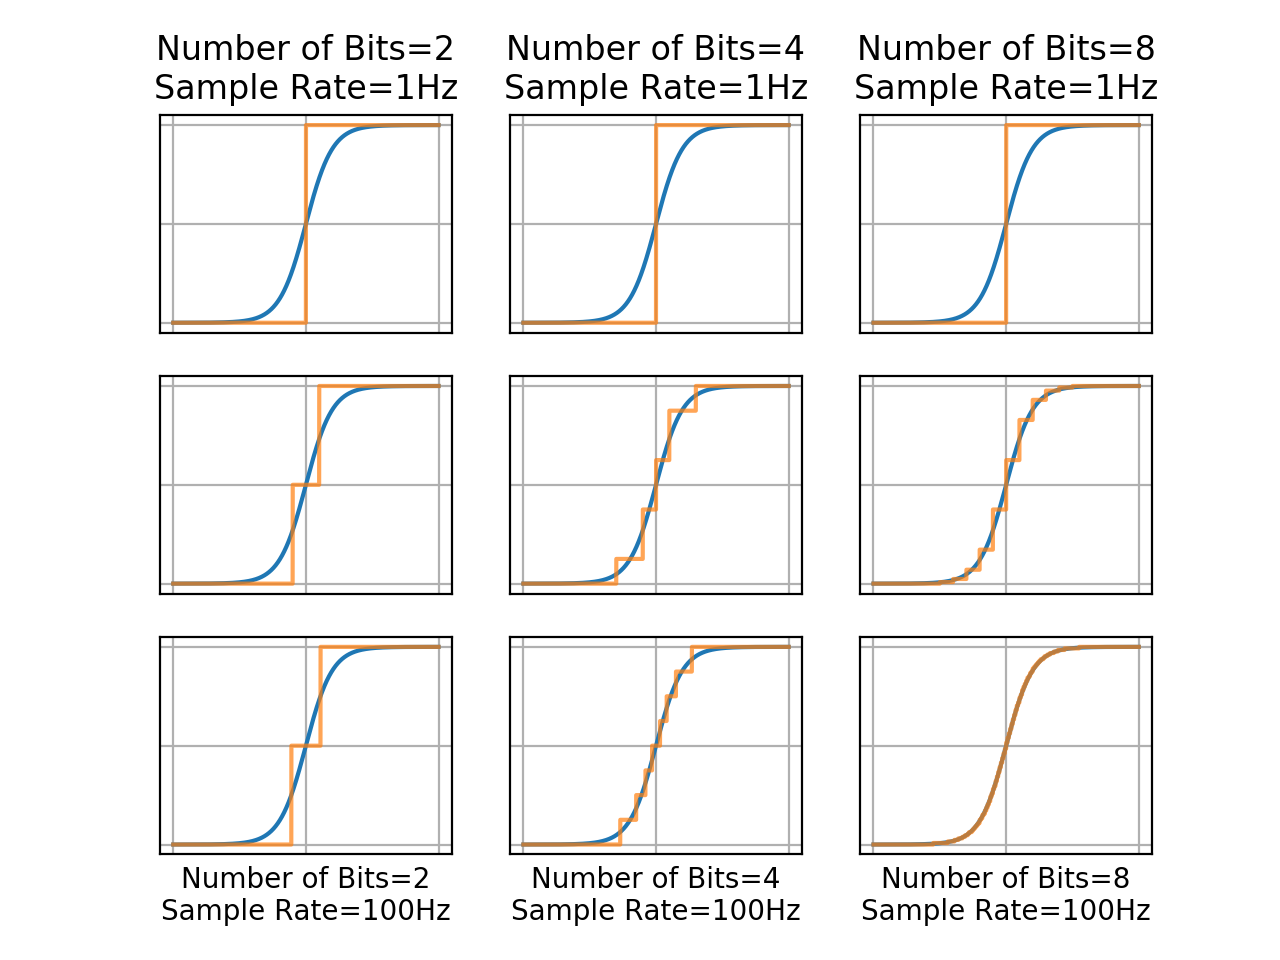

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=3)

for i, sample_rate in enumerate([1, 10, 100]):
    for j, bits in enumerate([2, 4, 8]):
        analog_to_digital(fig, axes[i, j], sample_rate, bits, digital_graph=True)
        #axes[i, j].xaxis.set_major_locator(plt.NullLocator())
        #axes[i, j].yaxis.set_major_locator(plt.NullLocator())
        if (i == 0 or i == 2):
            if i == 0:
                axes[i, j].set_title("Number of Bits={}\nSample Rate={}Hz".format(bits, sample_rate))
            else:
                axes[i, j].set_xlabel("Number of Bits={}\nSample Rate={}Hz".format(bits, sample_rate))
        axes[i, j].grid(True)
        turn_off_ticks(axes[i, j])

Now we will experience how these digitization artifacts manifest in actual digital music. Update the following path to point to a music file (.mp3, .wav; it may be that other formats are supported too).

In [7]:
from pathlib import Path
#music_dir = Path(r"C:\Users\Ryan Soklaski\Desktop\Ryan's Music")
songs = [r"./Music/Africa.mp3",
         r"./Music/Dancing Queen.mp3",
         r"./Music/Take On Me.mp3"]

# make sure that this variable is assigned to a path to a music file
local_song_path = songs[-2]

# load the digital signal for the first 11 seconds of the song
samples, fs = librosa.load(local_song_path, sr=44100, mono=True, duration=11)

Executing the following code will plot the native digital waveform for the first 11 seconds of the song you selected. It is likely that this recording was digitized at a sampling rate of 44100 Hz, and with a bit-depth of 16. Plotted on top of it is the signal digitized with a 10 Hz sampling rate, and a bit-depth of 6. Note that this digitization washes out nearly all of the song's features.

<IPython.core.display.Javascript object>


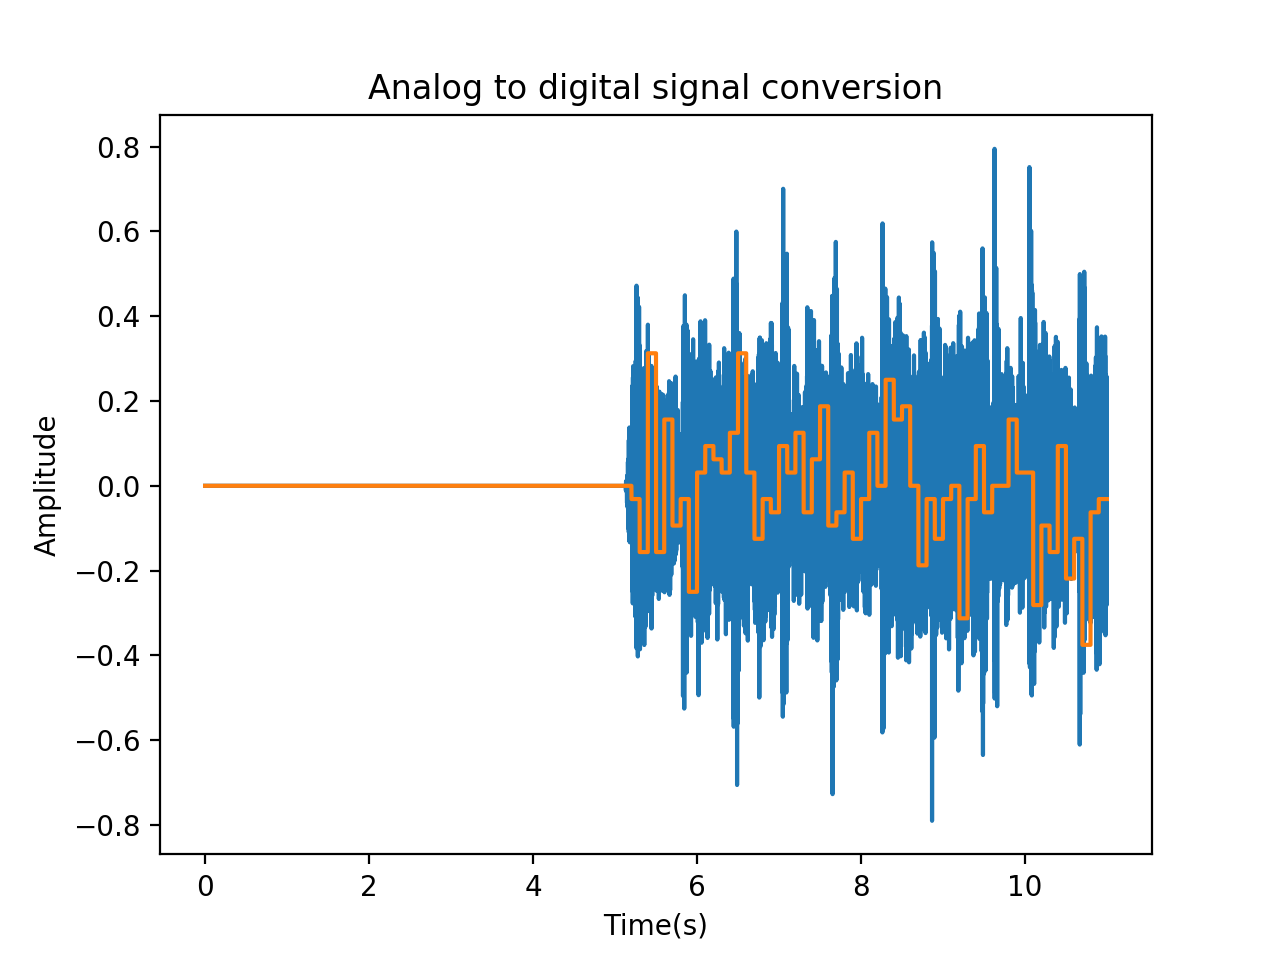

In [8]:
sampling_rate = 10. # Hz
quantizing_bits = 6
song_to_digital(local_song_path, sampling_rate, quantizing_bits)

Finally, let's listen to this 11 second clip using various sampling rates and bit-depths. Start with settings that will perfectly recreate the audio clip and then go from there!

In [ ]:
sampling_rate = ???  # Hz
bit_depth = ???

In [ ]:
## This is how the song sounds given your sampling rate and decision for how many bits of info to use when sampling
#Will use the same sampling and quantizing bits variables as above
#JUST RUN THIS

time = np.linspace(0, 11, 11 * 44100)
skip = int(len(samples) / (11 * sampling_rate))
sampling_signal = samples[::skip]

quantizing_levels = 2 ** (bit_depth - 1)
quantizing_step = 1. / quantizing_levels

quantizing_signal = np.round (sampling_signal / quantizing_step) * quantizing_step

new_l = len(time) / len(quantizing_signal)
new_y = []
for i in range(len(quantizing_signal)):
    new_y += [quantizing_signal[i]] * int(new_l)

Audio(new_y, rate=44100)
